In [30]:
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_excel('Lab Session1 Data.xlsx')
print(df.iloc[:,:5])

# Define features (X) and target variable (y)
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Payment (Rs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
Mean Squared Error (MSE): 5.533385933582265e-26
Root Mean Squared Error (RMSE): 2.352315015805125e-13
R-squared (R2) Score: 1.0
Mean Absolute Percentage Error (MAPE): 1.2529022054387628e-13
Coefficients: [ 1. 55. 18.]
Intercept: -

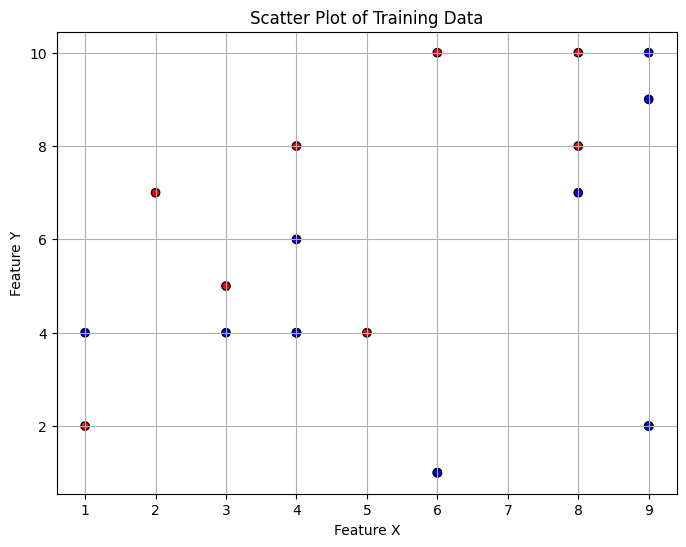

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Generate random data points
np.random.seed(0)
num_points = 20
X = np.random.randint(1, 11, size=(num_points, 2))  # 2 features varying between 1 and 10
y = np.random.randint(0, 2, size=num_points)  # Randomly assign class labels 0 or 1

# Assign colors based on class labels
colors = ['blue' if label == 0 else 'red' for label in y]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolors='k')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()


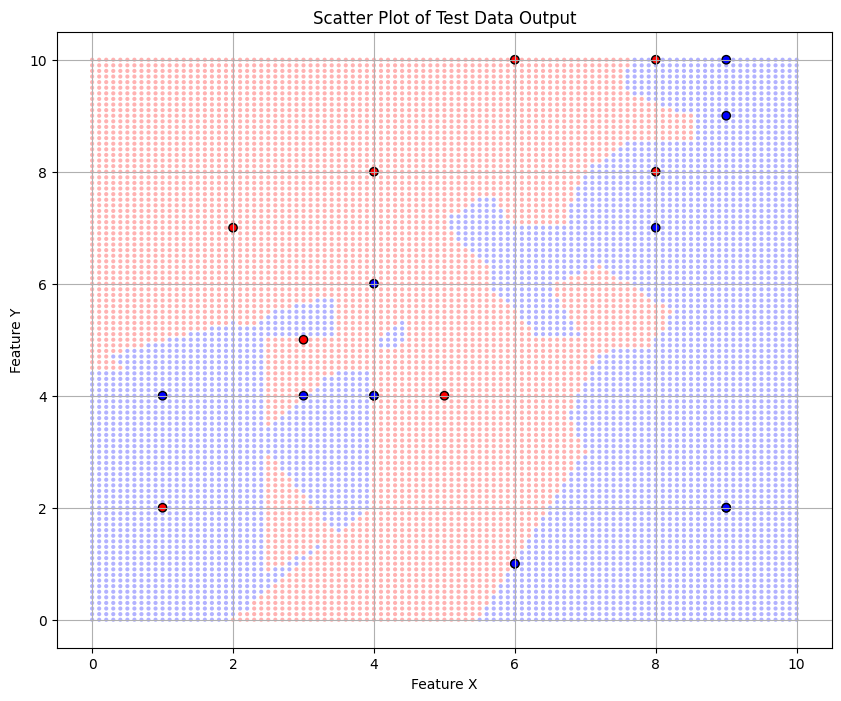

In [11]:



# Generate test set data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_test, y_test)
test_data = np.c_[xx.ravel(), yy.ravel()]

# Classify test set data using kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X, y)
predicted_classes = knn_classifier.predict(test_data)

# Color the points based on predicted class labels
colors_predicted = ['blue' if label == 0 else 'red' for label in predicted_classes]

# Scatter plot of test data output
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=colors_predicted, marker='.', edgecolors='none', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolors='k')
plt.title('Scatter Plot of Test Data Output')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()


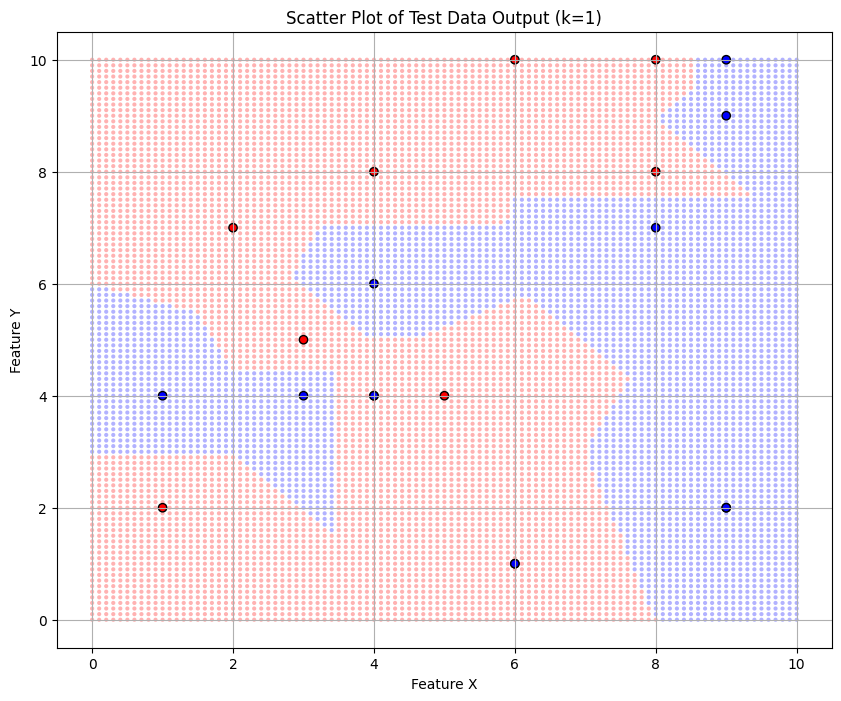

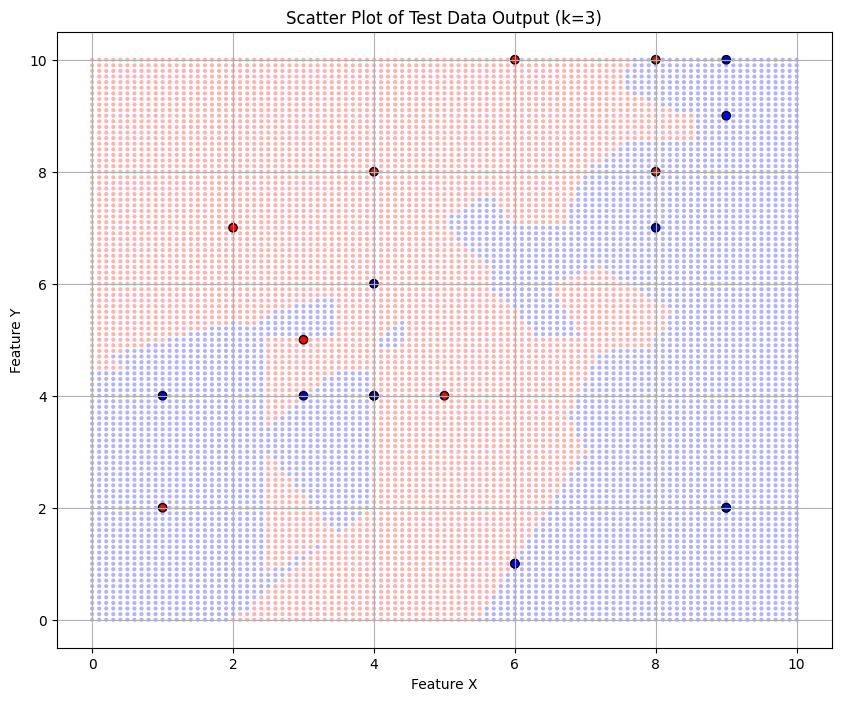

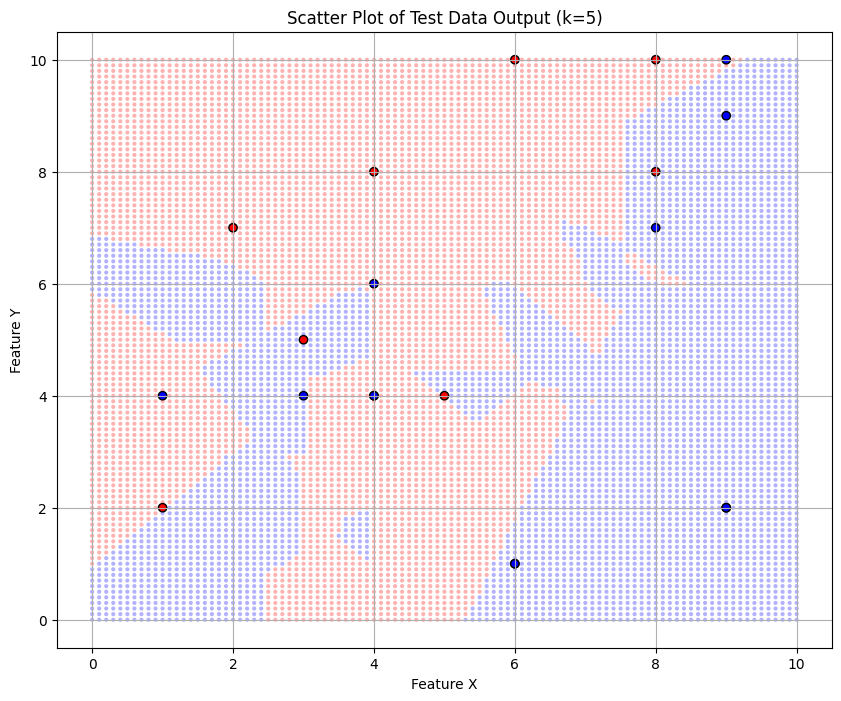

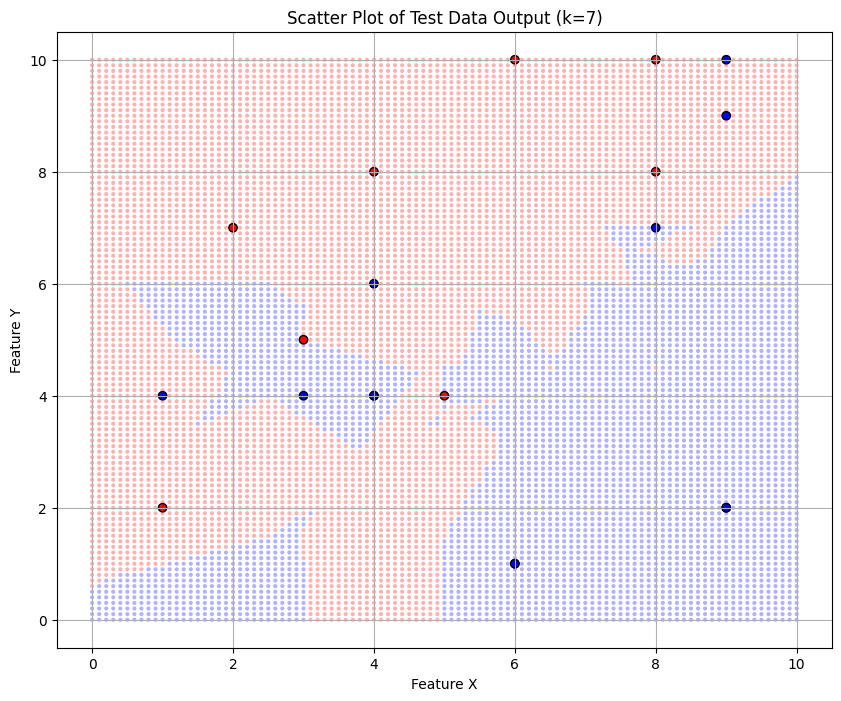

In [12]:

def classify_and_plot(k):
    # Generate test set data
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    xx, yy = np.meshgrid(x_test, y_test)
    test_data = np.c_[xx.ravel(), yy.ravel()]

    # Classify test set data using kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X, y)
    predicted_classes = knn_classifier.predict(test_data)

    # Color the points based on predicted class labels
    colors_predicted = ['blue' if label == 0 else 'red' for label in predicted_classes]

    # Scatter plot of test data output
    plt.figure(figsize=(10, 8))
    plt.scatter(test_data[:, 0], test_data[:, 1], c=colors_predicted, marker='.', edgecolors='none', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolors='k')
    plt.title('Scatter Plot of Test Data Output (k={})'.format(k))
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)
    plt.show()

# Test for different values of k
k_values = [1, 3, 5, 7]
for k in k_values:
    classify_and_plot(k)


Best parameters found: {'n_neighbors': 9}
Best k value found: 9


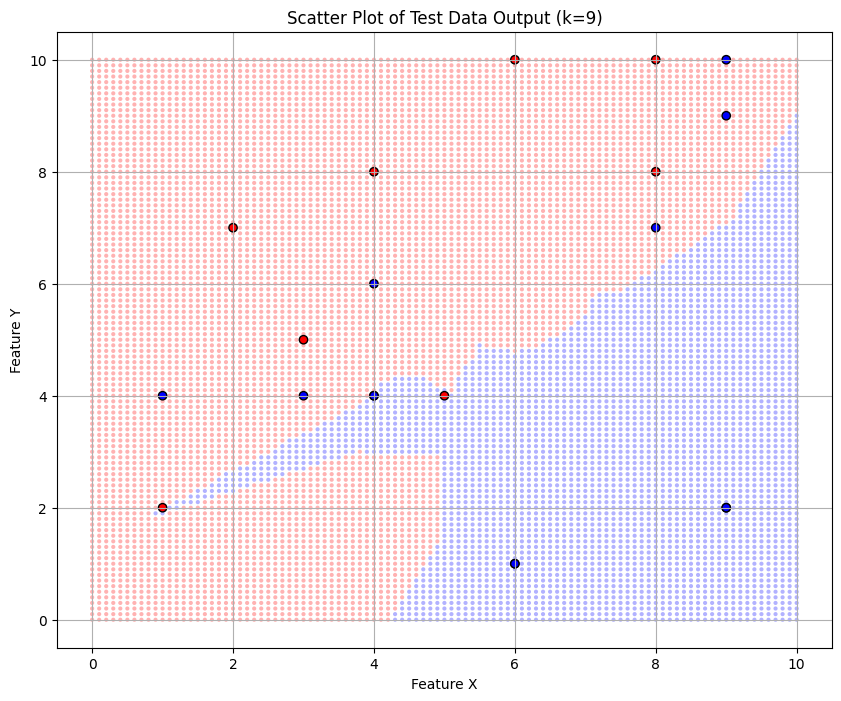

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 18)}

# Create kNN classifier
knn_classifier = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Print the best parameters
print("Best parameters found:", random_search.best_params_)
best_k_value = random_search.best_params_['n_neighbors']
print("Best k value found:", best_k_value)
classify_and_plot(best_k_value)
